# Table of Contents
- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Visualizations](#Visualizations)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)


# Introduction


This project explores customer purchase behavior using a Walmart dataset. The goal is to analyze patterns in customer demographics, spending habits, loyalty scores, and shopping frequency to understand what drives purchases. By uncovering trends through data visualization and analysis, this project aims to provide meaningful business insights.

In [23]:
# numpy is used for math and number stuff, like doing calculations or working with lists of numbers quickly.
import numpy as np 

#pandas helps you store and manage your data in tables, like Excel sheets.
import pandas as pd 

#matplotlib.pyplot is for drawing charts like bar graphs, line graphs, and pie charts.
import matplotlib.pyplot as plt 

#seaborn makes your graphs look prettier and more advanced than plain matplotlib.
import seaborn as sns 

# Set plot style
sns.set(style='whitegrid')

# Data Loading

load the dataset from the CSV file. Here Purchase_Date column is provided as a string. We infer it as a date type by converting it via pd.to_datetime

In [81]:
# Load the dataset
df = pd.read_csv('C:/Users/mehak taj/Downloads/archive (1).zip', encoding='ascii', delimiter=',')

# Convert the Purchase_Date column to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# Display basic information about the dataset
print('Dataset Loaded Successfully')
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Dataset Loaded Successfully
Number of rows: 50000
Number of columns: 12


# Data Cleaning and Preprocessing

here we perform some basic cleaning and preprocessing. We check for missing values which might have occurred due to errors during conversion 

In [85]:
# Overview of null values
print('Missing values by column:')
print(df.isnull().sum())

# Drop rows with missing Purchase_Date if any, as it is important for time based analysis
df = df.dropna(subset=['Purchase_Date'])

# For simplicity, fill missing values in other columns with appropriate defaults if necessary
for col in ['Age', 'Purchase_Amount', 'Rating']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Additional cleaning can be done here if necessary
print('Data cleaning complete. Current shape:', df.shape)

Missing values by column:
Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64
Data cleaning complete. Current shape: (50000, 12)


# Exploratory Data Analysis
We perform some exploratory analysis to understand the distribution and relationships between different variables. This includes summary statistics, distribution plots, and pair plots among numeric features.

                            Customer_ID  Age  Gender           City  \
0  84607c1f-910c-44d5-b89f-e1ee06dd34c0   49  Female    New Cynthia   
1  f2a81712-a73e-4424-8b39-4c615a0bd4ea   36   Other       Cruzport   
2  da9be287-8b0e-4688-bccd-1a2cdd7567c6   52    Male    Jeffreytown   
3  50ec6932-3ac7-492f-9e55-4b148212f302   47  Female  Jenniferburgh   
4  8fdc3098-fc75-4b0f-983c-d8d8168c6362   43   Other      Kingshire   

      Category Product_Name Purchase_Date  Purchase_Amount    Payment_Method  \
0  Electronics   Smartphone    2024-08-30           253.26  Cash on Delivery   
1     Clothing      T-Shirt    2024-12-21            73.19        Debit Card   
2       Beauty      Perfume    2024-12-26           125.62       Credit Card   
3  Electronics   Smartwatch    2024-11-04           450.32       Credit Card   
4  Electronics   Smartphone    2024-10-07           369.28       Credit Card   

  Discount_Applied  Rating Repeat_Customer  
0               No       1             Yes  
1 

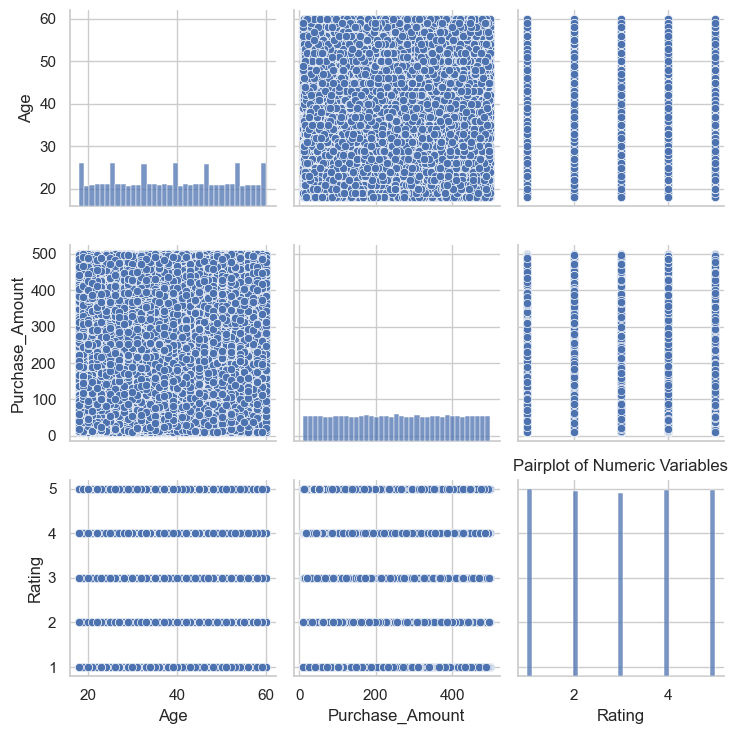

In [91]:
# Overview
print(df.head())
print(df.describe())
print(df.info())

# List of numeric columns
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric Columns:', list(numeric_df.columns))

# Pairplot of numeric variables if there are at least 2 numeric columns
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df)
    plt.title('Pairplot of Numeric Variables')
    plt.tight_layout()
    plt.show()

# Visualizations
Here we generate several visualizations in the notebook to provide insights into the data. The following plots include histograms for distributions, count plots for categorical variables and other specific plots such as box plots and violin plots to identify patterns in the data.

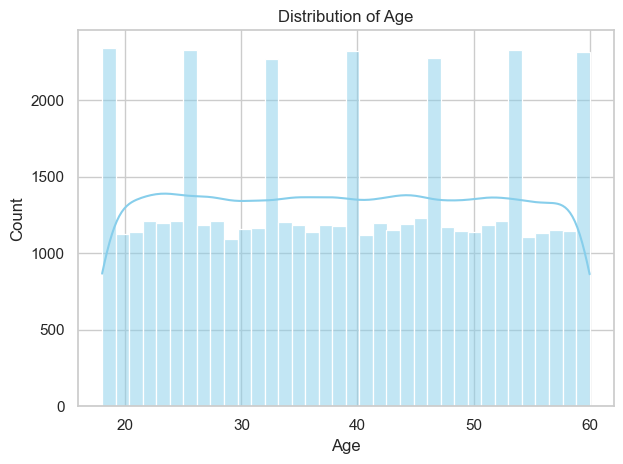

In [59]:
# Histogram for Age
plt.figure()
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

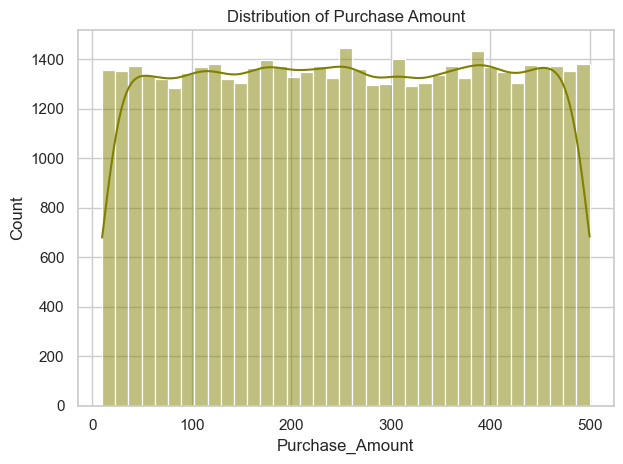

In [63]:
# Histogram for Purchase Amount
plt.figure()
sns.histplot(df['Purchase_Amount'], kde=True, color='olive')
plt.title('Distribution of Purchase Amount')
plt.tight_layout()
plt.show()

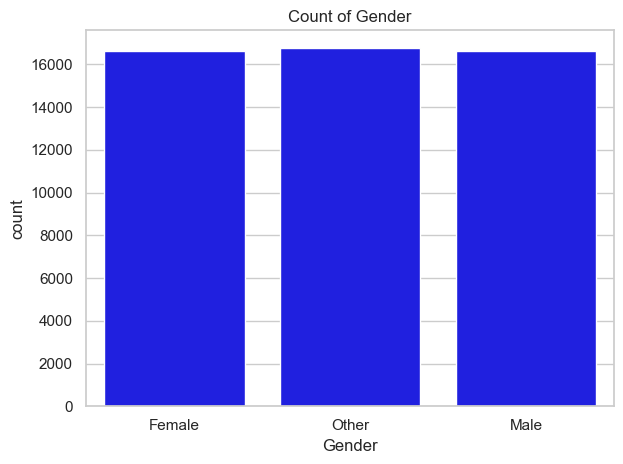

In [65]:
# Count Plot for Gender
plt.figure()
sns.countplot(x='Gender', data=df, color='blue')
plt.title('Count of Gender')
plt.tight_layout()
plt.show()

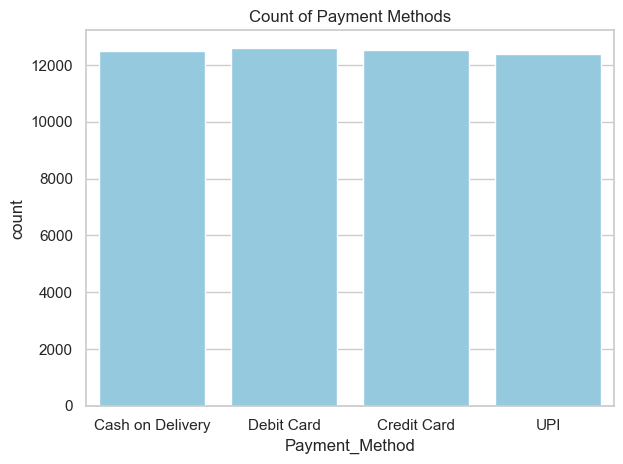

In [67]:
# Count Plot for Payment_Method
plt.figure()
sns.countplot(x='Payment_Method', data=df, color='skyblue')
plt.title('Count of Payment Methods')
plt.tight_layout()
plt.show()

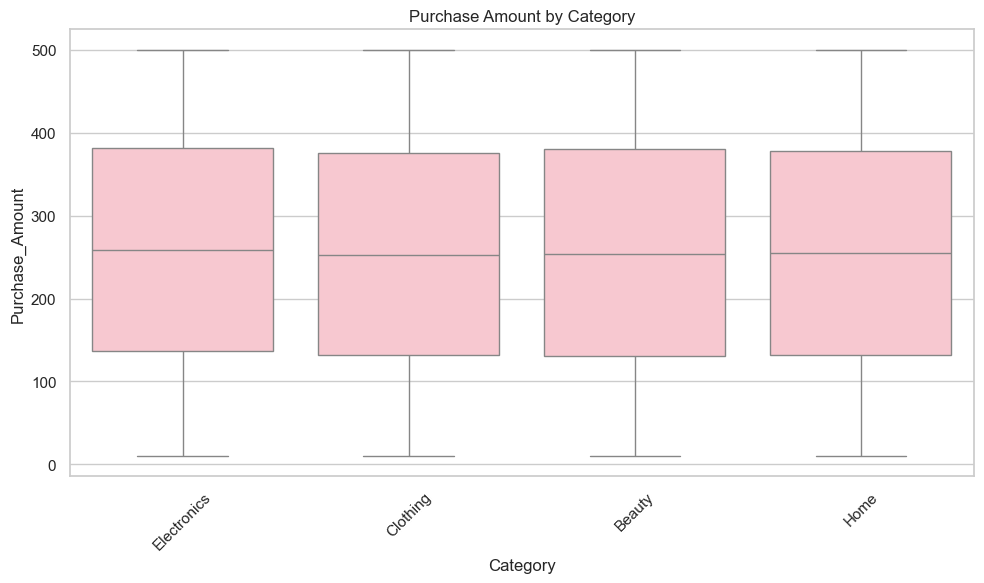

In [69]:

# Box Plot for Purchase Amount by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase_Amount', data=df, color='pink')
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

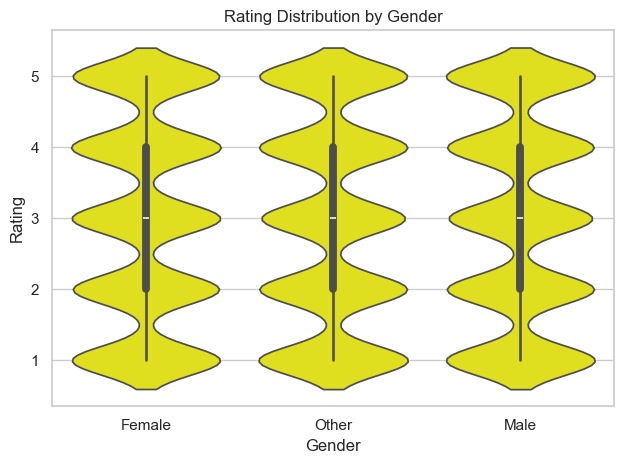

In [71]:
# Violin Plot for Rating by Gender
plt.figure()
sns.violinplot(x='Gender', y='Rating', data=df, color='yellow')
plt.title('Rating Distribution by Gender')
plt.tight_layout()
plt.show()

# Predictive Modeling

predictive model in this analysis is to predict the Repeat_Customer field.

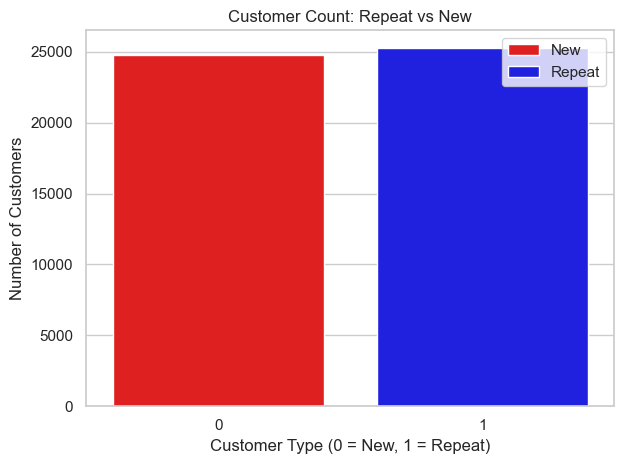

In [99]:
#Convert 'Repeat_Customer' Yes/No to 1 and 0
df['Repeat_Customer_Flag'] = df['Repeat_Customer'].map({'Yes': 1, 'No': 0})

#See who spends more — Repeat vs New customers
# Plot for New Customers (0)
sns.countplot(data=df[df['Repeat_Customer_Flag'] == 0], x='Repeat_Customer_Flag', color='red', label='New')

# Plot for Repeat Customers (1)
sns.countplot(data=df[df['Repeat_Customer_Flag'] == 1], x='Repeat_Customer_Flag', color='blue', label='Repeat')

plt.title("Customer Count: Repeat vs New")
plt.xlabel("Customer Type (0 = New, 1 = Repeat)")
plt.ylabel("Number of Customers")
plt.legend()
plt.tight_layout()
plt.show()


# Conclusion

customer insights:

The majority of Walmart customers are evenly distributed across genders.

Age and purchase amount follow natural distributions, with younger and middle-aged customers forming the bulk of purchases.

Box plots and violin plots helped us uncover category-specific spending patterns and rating behaviors by gender.

Through visual comparison of repeat vs new customers, we observed that both customer types are nearly equal in number, indicating Walmart has a balanced mix of new and loyal customers.

Overall, this project provides a strong foundation for understanding who Walmart's customers are, how they behave, and how such data-driven insights can help in customer retention strategies and personalized marketing.
